### Machine Learning Final Project

#### Question 1: Understanding the dataset and question

The goal of this project is to identify people who may have been involved in fraud at Enron by applying machine learning to the Enron dataset. Machine learning is useful for this project because it uses algorithms to learn from and make predictions based on data, ultimately detecting new patterns and trends in the dataset.

To begin the machine learning process, I familiarized myself with the dataset by loading the data into a pandas dataframe. Starting with data exploration allowed me to get an intuitive sense of the data and consider which features might be best for further analysis, before applying my machine learning model.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%run -i 'poi_id.py'

df = pd.DataFrame.from_dict(data_dict, orient='index')

print(list(df))
print(df.shape)
df


/Users/liz/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[('exercised_stock_options', '25.10'), ('total_stock_value', '24.47'), ('fraction_to_poi', '22.34'), ('bonus', '21.06'), ('salary', '18.58')]
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'fraction_from_poi', 'fraction_to_poi']
(145, 23)


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,fraction_from_poi,fraction_to_poi
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,2195,152,65,False,304805,1407,126027,NaN,0.016196,0.029613
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,0.000000,0.000000
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,29,864523,0,False,NaN,465,1757552,NaN,0.068905,0.000000
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN,0.000000,0.000000
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,69,NaN,False,NaN,NaN,145796,NaN,0.000000,0.000000
BAZELIDES PHILIP J,80818,NaN,684694,860136,NaN,NaN,NaN,NaN,NaN,1599641,...,NaN,874,NaN,False,93750,NaN,NaN,NaN,0.000000,0.000000
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,sally.beck@enron.com,NaN,NaN,126027,...,4343,566,386,False,NaN,2639,126027,NaN,0.019686,0.088879
BELDEN TIMOTHY N,213999,7991,2144013,5501630,NaN,5249999,tim.belden@enron.com,NaN,-2334434,1110705,...,484,210698,108,True,NaN,5521,157569,NaN,0.028532,0.223140
BELFER ROBERT,NaN,NaN,-102500,102500,NaN,NaN,NaN,44093,NaN,-44093,...,NaN,NaN,NaN,False,NaN,NaN,NaN,3285,0.000000,0.000000
BERBERIAN DAVID,216582,NaN,NaN,228474,NaN,NaN,david.berberian@enron.com,NaN,NaN,2493616,...,NaN,NaN,NaN,False,NaN,NaN,869220,NaN,0.000000,0.000000


Right away, there are two items to address - how to deal with "NaNs" and how to deal with outliers. 

In [2]:
df.replace('NaN', 0, inplace = True)
#df.drop('TOTAL', inplace = True)
df.shape
df.total_payments.max()

103559793

(array([ 59.,  22.,  45.,  13.,   2.,   1.,   0.,   0.,   0.,   3.]),
 array([       0. ,   111125.8,   222251.6,   333377.4,   444503.2,
          555629. ,   666754.8,   777880.6,   889006.4,  1000132.2,
         1111258. ]),
 <a list of 10 Patch objects>)

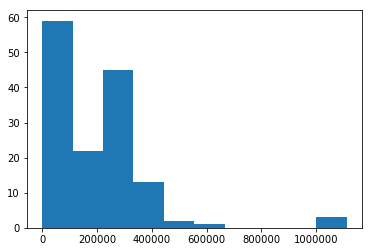

In [10]:
plt.scatter(df.)

In [57]:
df.groupby(by='poi')['total_payments'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,1.439839e+06,2.475245e+06,0.0,80621.0,860136.0,1742575.50,17252530.0
True,18.0,7.913590e+06,2.396549e+07,91093.0,1142396.0,1754027.5,2665344.75,103559793.0


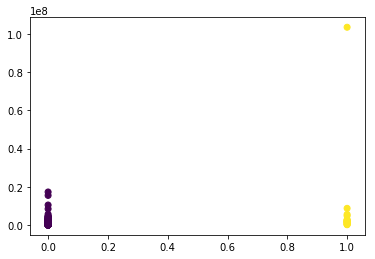

In [6]:
plt.scatter(df.poi, df.total_payments, c=df.poi)

In [59]:
df.groupby(by='poi')['bonus'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,5.050679e+05,9.722060e+05,0.0,0.0,100000.0,725000.0,8000000.0
True,18.0,1.844444e+06,2.036930e+06,0.0,700000.0,1225000.0,1687500.0,7000000.0


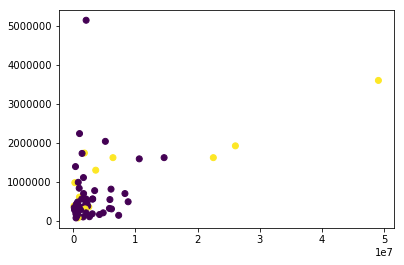

In [20]:
plt.scatter(df.total_stock_value, df.long_term_incentive, c=df.poi
        )

In [62]:
df.groupby(by='poi')['total_stock_value'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,2.000213e+06,3.356569e+06,-44093.0,191138.00,877611.0,2063366.50,23817930.0
True,18.0,9.165671e+06,1.384117e+07,126027.0,1016450.25,2206835.5,10511334.75,49110078.0


In [81]:
df.groupby(by='poi')['long_term_incentive'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,268217.157480,607514.334366,0.0,0.0,0.0,317983.0,5145434.0
True,18.0,803241.611111,988879.963568,0.0,0.0,362652.0,1536503.5,3600000.0


In [56]:
df.groupby(by='poi')['to_messages'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,1137.889764,2254.776339,0.0,0.0,209.0,1279.0,15149.0
True,18.0,1880.000000,2003.121799,0.0,387.0,1543.0,2542.0,7991.0


In [69]:
df.groupby(by='poi')['from_messages'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,379.141732,1522.352736,0.0,0.0,15.0,48.50,14368.0
True,18.0,233.611111,716.309097,0.0,16.5,37.5,76.75,3069.0


In [15]:
df['from_ratio'] = df['from_this_person_to_poi']/df['from_messages']

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [64]:
df.groupby(by='poi')['from_poi_to_this_person'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,33.165354,72.181073,0.0,0.00,0.0,35.00,528.0
True,18.0,76.055556,78.572913,0.0,17.75,52.5,114.25,240.0


In [70]:
df.groupby(by='poi')['from_this_person_to_poi'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,20.566929,66.410172,0.0,0.0,0.0,7.5,411.0
True,18.0,51.888889,141.331853,0.0,4.5,14.5,24.0,609.0


In [77]:
df.groupby(by='poi')['shared_receipt_with_poi'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,127.0,600.110236,999.999732,0.0,0.00,50.0,725.50,4527.0
True,18.0,1386.777778,1343.684861,0.0,284.25,1195.0,2083.25,5521.0
